In [1]:
import prep
import peaks_detection
import data_plot
import biosppy
import seaborn as sns
import neurokit2 as nk
import matplotlib.pyplot as plt

In [2]:
filename = 'data_2/normokapnia/e[3]_[n]_[01].csv'
signal_name = 'abp_finger_mm_hg_[abp_finger_mm_Hg_]'
alternative_signal_name = 'abp_finger[abp_finger]'

SAMPLE_RATE = 200

In [3]:
try:
    df = prep.read_data(filename, signal_name, ';')
except KeyError:
    df = prep.read_data(filename, alternative_signal_name, ';')
df.interpolate(method='linear', inplace=True)

In [4]:
signal = df['Values']

In [5]:
filtered_abp = biosppy.signals.abp.abp(df["Values"], sampling_rate=200, show=False)[1]
df['Values'] = filtered_abp

In [6]:
rr_m = peaks_detection.rr_intervals(df['Values'], sampling_rate=200)

In [7]:
rr_nk = peaks_detection.nk_rr_intervals(signal, sampling_rate=200)

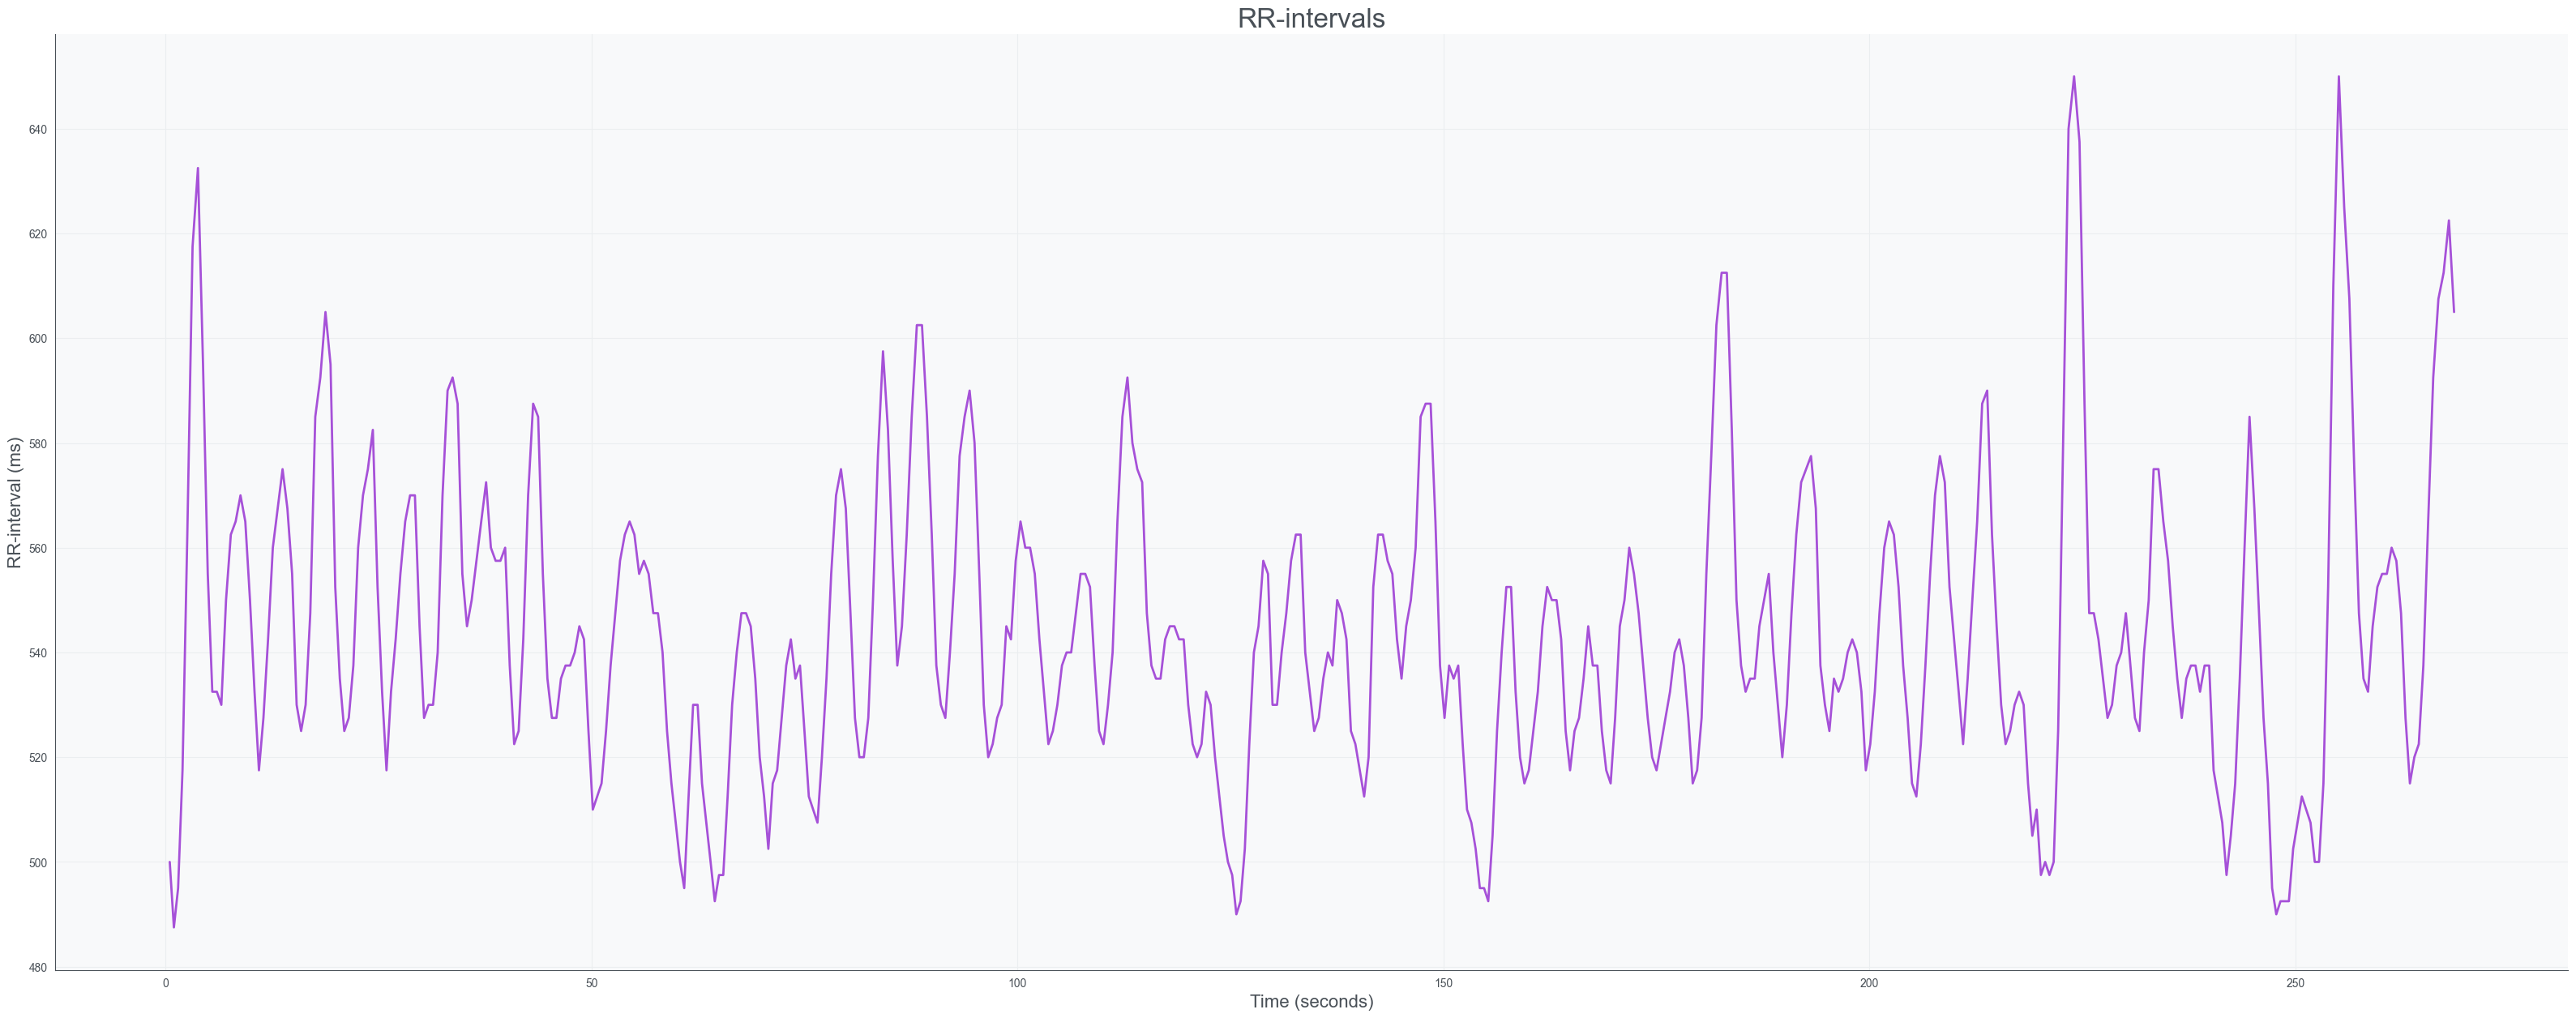

In [8]:
peaks_detection.plot_rr_intervals(rr_m, True)

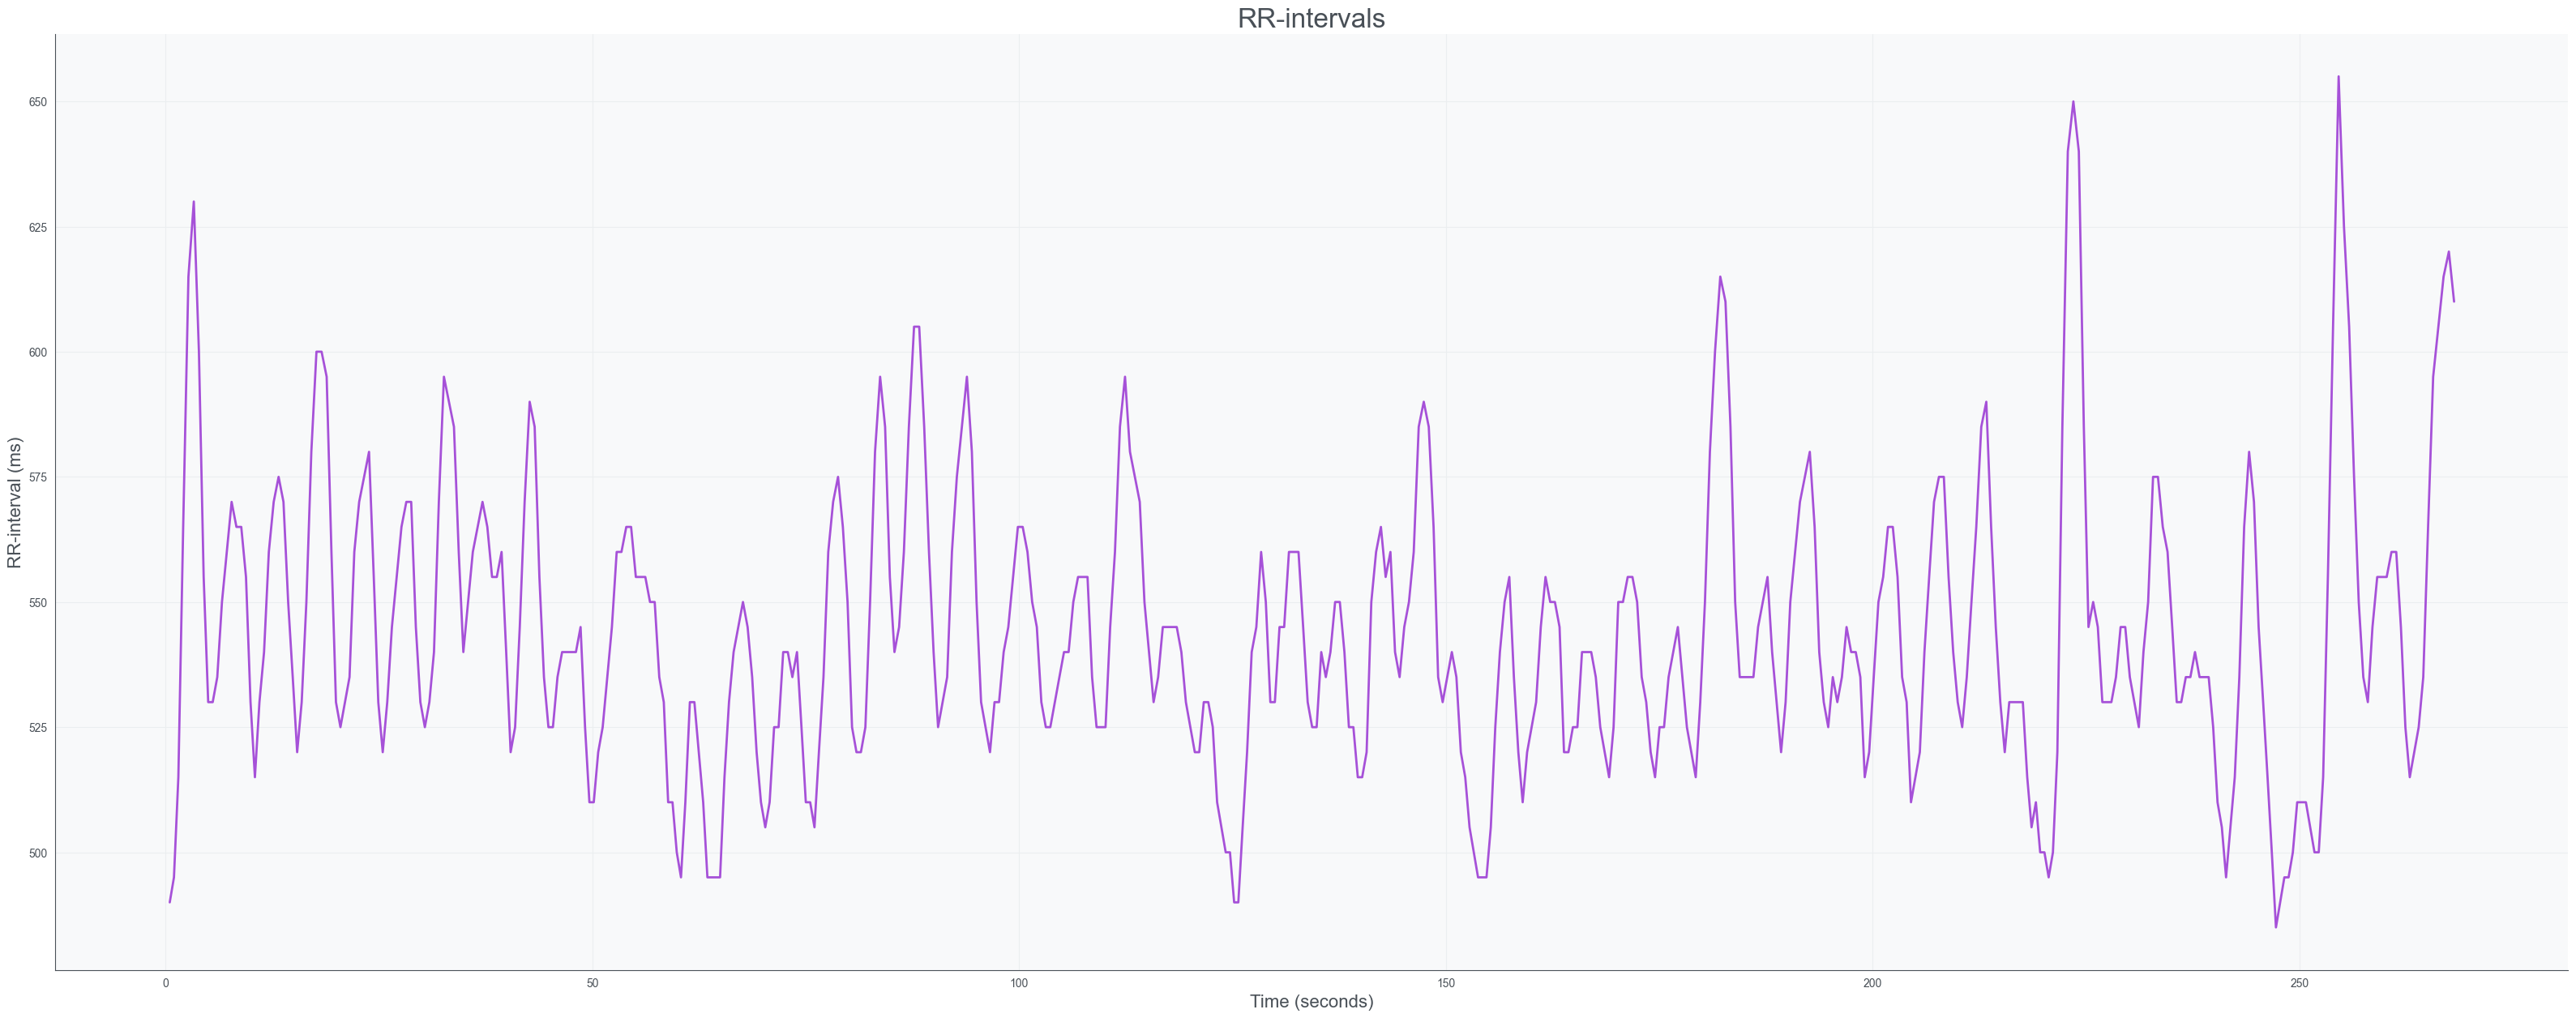

In [9]:
peaks_detection.plot_rr_intervals(rr_nk, True)